# prosper loan data
## by (Amr Saber Awad Salem)

## Preliminary Wrangling

> Prosper is America’s first marketplace lending platform, with over $12 billion in funded loans. And in this EDA we shall investigate a protion of their loan records to try and extract useful insights that can help improving the services through finding more about the clients. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> In this part we'll be going through our dataset to get to know it's shape, and most important features

In [2]:
df= pd.read_csv('prosperLoanData.csv')

In [3]:
# To display the whole column, row names and info
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# To see if there's any duplicated records within the unique listing key
df['ListingKey'].duplicated().sum()

871

In [7]:
# Here drop the entries that have duplicated listing key, and resetting the index.
df= df.drop_duplicates(subset=['ListingKey'])
df.reset_index(inplace=True)

In [8]:
# To check that the duplicated listing keys have been removed
df['ListingKey'].duplicated().sum()

0

In [9]:
# Creating a "year" column, by splitting the year part from the date column. And setting its type to string
df['year']=df['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)

In [10]:
# replacing the Nan and missing values with "0"
df.fillna(0,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   index                                113066 non-null  int64  
 1   ListingKey                           113066 non-null  object 
 2   ListingNumber                        113066 non-null  int64  
 3   ListingCreationDate                  113066 non-null  object 
 4   CreditGrade                          113066 non-null  object 
 5   Term                                 113066 non-null  int64  
 6   LoanStatus                           113066 non-null  object 
 7   ClosedDate                           113066 non-null  object 
 8   BorrowerAPR                          113066 non-null  float64
 9   BorrowerRate                         113066 non-null  float64
 10  LenderYield                          113066 non-null  float64
 11  EstimatedEffe

In [12]:
# To see the null values within each column
df.isnull().sum()

index                                  0
ListingKey                             0
ListingNumber                          0
ListingCreationDate                    0
CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
GroupKey        

### What is the structure of your dataset?

> from the preliminary analysis on the dataset, we see that there're 113937 loan records with a 871 duplicated ones. Also, it appears that most of the attributes are of a numerical nature 

### What is/are the main feature(s) of interest in your dataset?

> Having such a detailed records is great to explore different assumptions. However, I will will be focusing on seeing the relation between employment and taking a loan. 
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Though there're too many features that we can look into and get really excited insights from them, but we'll be focusing on :
> ##### * ListingCreationDate (The date the listing was created)
> ##### * Term (The length of the loan expressed in months)
> ##### * LoanStatus (The current status of the loan -Past Due status will be accompained by a delinquency bucket-)
> ##### * BorrowerRate (The Borrower's interest rate for this loan)
> ##### * ProsperScore (custom risk score)
> ##### * ListingCategory (Category selected by the borrower for the listing when they posted it)
> ##### * Occupation (The occupation selected by the borrower at the time they created the listing)
> ##### * EmploymentStatus (The employment status of the borrower)
> ##### * EmploymentStatusDuration (The length in months of the employment status at the time the listing was created)
> ##### * OpenCreditLines (Number of open credit line)
> ##### * IncomeRange (The income range of the borrower at the time the listing was created)
> ##### * LoanOriginalAmount (The origination amount of the loan)
> ##### * MonthlyLoanPayment (The scheduled monthly loan payment)

# In this part I am going to dissect my original dataset with my main chosen features, modify some incorrect data types, and make it more tidy.

In [13]:
# During analysis, it's better to use a copy of the original data, in order to not mess any of the original raw data and have it as a back-up
clean_df= df.copy()

In [14]:
# Here we dissect the dataset according to the columns that we'll use in our analysis
cols= ['ListingCreationDate','Term','LoanStatus','BorrowerRate','ProsperScore','ListingCategory (numeric)',
       'Occupation','EmploymentStatus','EmploymentStatusDuration','OpenCreditLines','IncomeRange',
       'LoanOriginalAmount','MonthlyLoanPayment', 'year']
clean_df= clean_df[cols]

In [15]:
clean_df.head()

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,OpenCreditLines,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,year
0,2007-08-26 19:09:29.263000000,36,Completed,0.1580,0.0,0,Other,Self-employed,2.0,4.0,"$25,000-49,999",9425,330.43,2007
1,2014-02-27 08:28:07.900000000,36,Current,0.0920,7.0,2,Professional,Employed,44.0,14.0,"$50,000-74,999",10000,318.93,2014
2,2007-01-05 15:00:47.090000000,36,Completed,0.2750,0.0,0,Other,Not available,0.0,0.0,Not displayed,3001,123.32,2007
3,2012-10-22 11:02:35.010000000,36,Current,0.0974,9.0,16,Skilled Labor,Employed,113.0,5.0,"$25,000-49,999",10000,321.45,2012
4,2013-09-14 18:38:39.097000000,36,Current,0.2085,4.0,2,Executive,Employed,44.0,19.0,"$100,000+",15000,563.97,2013


In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113066 non-null  object 
 1   Term                       113066 non-null  int64  
 2   LoanStatus                 113066 non-null  object 
 3   BorrowerRate               113066 non-null  float64
 4   ProsperScore               113066 non-null  float64
 5   ListingCategory (numeric)  113066 non-null  int64  
 6   Occupation                 113066 non-null  object 
 7   EmploymentStatus           113066 non-null  object 
 8   EmploymentStatusDuration   113066 non-null  float64
 9   OpenCreditLines            113066 non-null  float64
 10  IncomeRange                113066 non-null  object 
 11  LoanOriginalAmount         113066 non-null  int64  
 12  MonthlyLoanPayment         113066 non-null  float64
 13  year                       11

In [17]:
#Now we're going to convert the date column from object to DateTime type:
clean_df['ListingCreationDate'] = pd.to_datetime(clean_df['ListingCreationDate'])

In [18]:
# Just to make sure that the data types within the columns are the same to avoid any errors
clean_df['Term'] = clean_df['Term'].astype(int)
clean_df['LoanStatus'] = clean_df['LoanStatus'].astype(str)
clean_df['BorrowerRate'] = clean_df['BorrowerRate'].astype(float)
clean_df['ProsperScore'] = clean_df['ProsperScore'].astype(int)
clean_df['ListingCategory (numeric)'] = clean_df['ListingCategory (numeric)'].astype(int)
clean_df['Occupation'] = clean_df['Occupation'].astype(str)
clean_df['EmploymentStatus'] = clean_df['EmploymentStatus'].astype(str)
clean_df['EmploymentStatusDuration'] = clean_df['EmploymentStatusDuration'].astype(float)
clean_df['OpenCreditLines'] = clean_df['OpenCreditLines'].astype(float)
clean_df['IncomeRange'] = clean_df['IncomeRange'].astype(str)
clean_df['LoanOriginalAmount'] = clean_df['LoanOriginalAmount'].astype(int)
clean_df['MonthlyLoanPayment'] = clean_df['MonthlyLoanPayment'].astype(float)

In [19]:
# To verify that the columns data types have been successfully converted.
clean_df.dtypes

ListingCreationDate          datetime64[ns]
Term                                  int32
LoanStatus                           object
BorrowerRate                        float64
ProsperScore                          int32
ListingCategory (numeric)             int32
Occupation                           object
EmploymentStatus                     object
EmploymentStatusDuration            float64
OpenCreditLines                     float64
IncomeRange                          object
LoanOriginalAmount                    int32
MonthlyLoanPayment                  float64
year                                 object
dtype: object

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

36    87224
60    24228
12     1614
Name: Term, dtype: int64


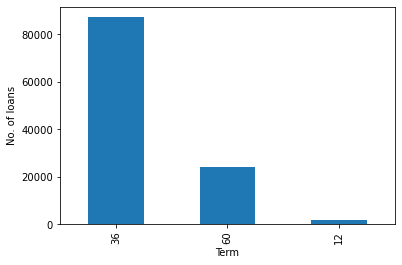

In [21]:
clean_df['Term'].value_counts().plot(kind='bar')
print(clean_df['Term'].value_counts())
plt.xlabel('Term');
plt.ylabel('No. of loans');
plt.title('Loan terms distribution');

> #### In the above figure we can see that the most chosen loan length was the 36 months one

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


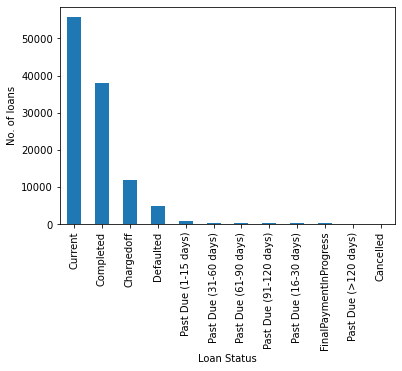

In [22]:
clean_df['LoanStatus'].value_counts().plot(kind='bar')
print(clean_df['LoanStatus'].value_counts())
plt.xticks(rotation=90);
plt.xlabel('Loan Status');
plt.ylabel('No. of loans');
plt.title('Loan statuses distribution');

> #### Here we can see that the portion of the borowwers that are past due - regardless of how many days they'er late -  is way too low compared to either have completed or currently still on loan

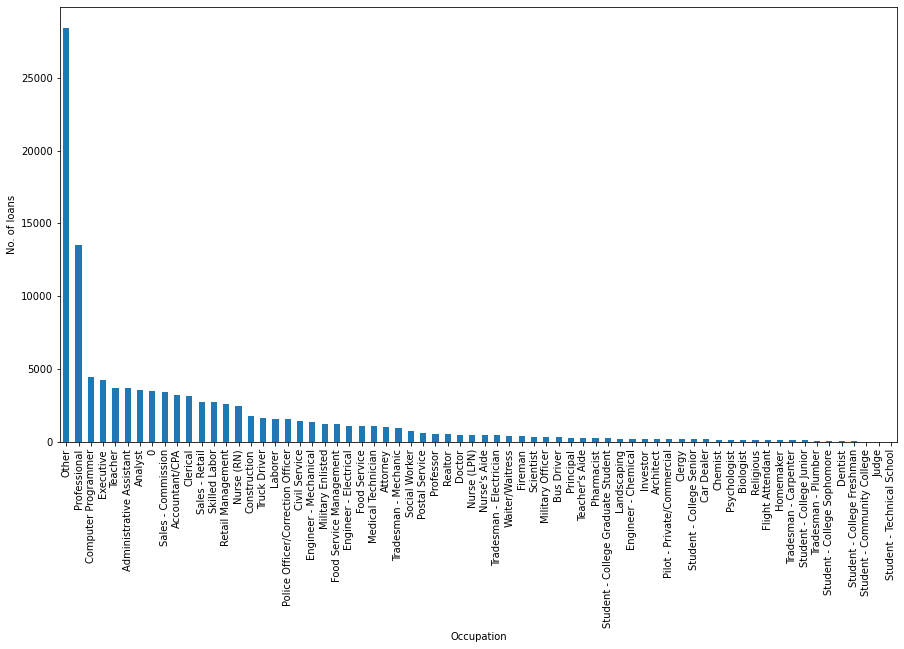

In [23]:
plt.figure(figsize=(15, 8))
clean_df['Occupation'].value_counts().plot(kind='bar')
plt.xticks(rotation=90);
plt.xlabel('Occupation');
plt.ylabel('No. of loans');
plt.title('Distribution of Occupation');

> #### Fun note: 
Before seeing this graph I thought that computer programmers earn very high salaries that they don't need any loans, but then they came here in the 3rd place and us -Chemical Engineers- came in the 47th place.
 So, I guess I won't be shifting my career, not yet at least :D

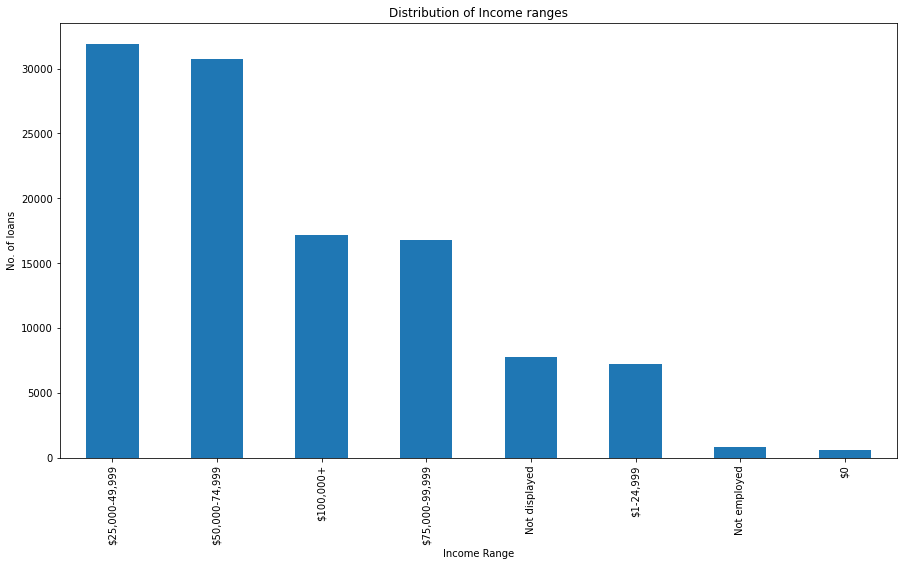

In [49]:
plt.figure(figsize=(15, 8))
clean_df['IncomeRange'].value_counts().plot(kind='bar')
plt.xticks(rotation=90);
plt.xlabel('Income Range');
plt.ylabel('No. of loans');
plt.title('Distribution of Income ranges');

> #### In the above figure we can see that middle and upper middle income ranges compose the larger proportion of borrowers, then come the higher income ranges, then the lower income range. However, we find that within each two close income groups the borrowers numbers are nearly the same.

Highest 10 monthly loan payment are:
 108962    2251.51
8562      2218.53
48896     2179.22
58497     2163.63
17467     2153.38
85374     2147.64
95611     2134.06
76339     2111.78
58126     1808.84
20486     1781.28
Name: MonthlyLoanPayment, dtype: float64

 Smallest 10 monthly loan payment are:
  26     0.0
65     0.0
112    0.0
197    0.0
309    0.0
366    0.0
709    0.0
731    0.0
789    0.0
879    0.0
Name: MonthlyLoanPayment, dtype: float64
Mean monthly loan payment is:  271.93274220369113


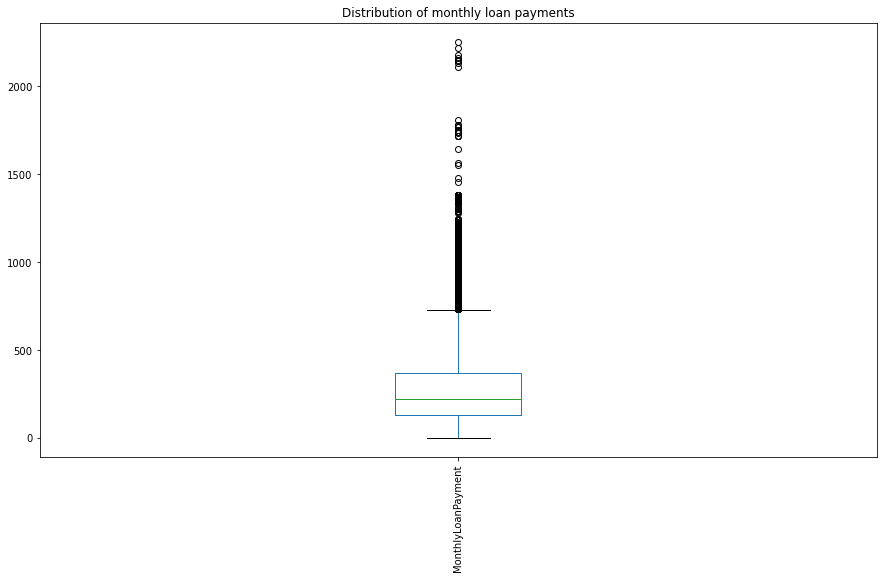

In [25]:
# This box plot will show us the min, max, mean, and outliers within the Monthly loan payments attribute.
# Also, we see the 10 largest and smallest monthly payments.
plt.figure(figsize=(15, 8))
clean_df['MonthlyLoanPayment'].plot(kind='box')
plt.xticks(rotation=90);
print('Highest 10 monthly loan payment are:\n' , clean_df['MonthlyLoanPayment'].nlargest(10))
print('\n Smallest 10 monthly loan payment are:\n ', clean_df['MonthlyLoanPayment'].nsmallest(10))
print('Mean monthly loan payment is: ',clean_df['MonthlyLoanPayment'].mean())
plt.title('Distribution of monthly loan payments');

In [26]:
# Getting the largest 10 monthly loan payment loan records. 
clean_df.nlargest(10,'MonthlyLoanPayment')

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,OpenCreditLines,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,year
108962,2013-01-12 07:03:48.617,12,Completed,0.1458,3,1,Executive,Employed,278.0,21.0,"$100,000+",25000,2251.51,2013
8562,2012-08-17 06:24:18.700,12,Completed,0.1177,8,1,Construction,Employed,293.0,11.0,"$100,000+",25000,2218.53,2012
48896,2012-12-21 12:28:32.460,12,Completed,0.0839,8,15,Doctor,Employed,52.0,13.0,"$100,000+",25000,2179.22,2012
58497,2013-02-25 18:38:39.663,12,FinalPaymentInProgress,0.0704,8,7,Architect,Employed,44.0,7.0,"$100,000+",25000,2163.63,2013
17467,2013-01-23 11:46:16.803,12,Completed,0.0615,10,2,Attorney,Employed,55.0,8.0,"$100,000+",25000,2153.38,2013
85374,2012-08-06 07:47:51.033,12,Completed,0.0565,10,12,Doctor,Employed,27.0,14.0,"$100,000+",25000,2147.64,2012
95611,2012-07-20 00:38:37.777,12,Completed,0.1215,5,2,Professional,Employed,45.0,8.0,"$100,000+",24000,2134.06,2012
76339,2012-04-25 12:11:18.893,12,Completed,0.0628,8,7,Computer Programmer,Employed,152.0,6.0,"$75,000-99,999",24500,2111.78,2012
58126,2013-02-01 10:15:40.523,12,Completed,0.0615,10,1,Professional,Employed,159.0,12.0,"$100,000+",21000,1808.84,2013
20486,2013-03-21 11:59:21.503,12,Current,0.1246,5,1,Investor,Employed,9.0,4.0,"$75,000-99,999",20000,1781.28,2013


In [27]:
# Getting the smallest 10 monthly loan payment loan records. 
clean_df.nsmallest(10, 'MonthlyLoanPayment')

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,OpenCreditLines,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,year
26,2010-06-16 16:23:44.533,36,Completed,0.0920,9,1,Executive,Full-time,10.0,16.0,"$75,000-99,999",4000,0.0,2010
65,2007-04-12 17:00:57.690,36,Completed,0.1500,0,0,Other,Not employed,1.0,3.0,Not employed,1000,0.0,2007
112,2007-02-23 01:40:19.853,36,Completed,0.2900,0,0,Other,Self-employed,37.0,0.0,"$50,000-74,999",3000,0.0,2007
197,2010-08-01 08:26:42.480,36,Completed,0.2575,8,7,Professional,Employed,3.0,7.0,"$100,000+",3000,0.0,2010
309,2006-06-22 04:42:40.490,36,Completed,0.1175,0,0,0,0,0.0,0.0,Not displayed,1800,0.0,2006
366,2008-04-17 06:10:43.373,36,Completed,0.2835,0,4,Sales - Retail,Full-time,13.0,7.0,"$1-24,999",1545,0.0,2008
709,2010-09-14 06:47:12.347,36,Completed,0.1365,8,3,Professional,Employed,112.0,13.0,"$100,000+",15000,0.0,2010
731,2007-06-07 11:59:54.850,36,Defaulted,0.2225,0,0,Other,Full-time,21.0,10.0,"$25,000-49,999",4000,0.0,2007
789,2008-04-24 16:42:57.920,36,Completed,0.0500,0,4,Teacher,Full-time,32.0,6.0,"$25,000-49,999",1000,0.0,2008
879,2008-09-03 10:35:43.123,36,Completed,0.2000,0,5,Fireman,Full-time,140.0,5.0,"$50,000-74,999",1000,0.0,2008


> #### In the above figure we can see that the large outliers can be logically justified upon further analysis, as it seems that there is a cluster of high monthly loan payments. 
> #### Which indeed is shown in the above table, as we can justify this by seeing that the largest 10 borrowers are within the high income range, and have borrowed a large loan.
> #### On the other hand, we can see that the smallest payments =0 are of either completed or defaulted loans, not of current loans.

0     29084
4     12443
6     12161
8     11953
7     10489
5      9732
3      7565
9      6865
2      5706
10     4691
11     1431
1       946
Name: ProsperScore, dtype: int64


Text(0.5, 1.0, 'Distribution of prosper score')

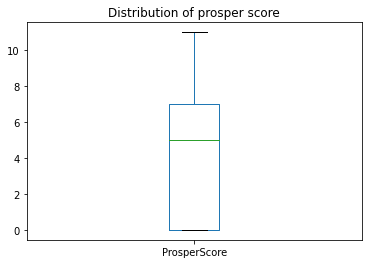

In [28]:
# This box plot will show us the min, max, mean, and outliers within the prosper score attribute.
clean_df['ProsperScore'].plot(kind='box')
print(clean_df['ProsperScore'].value_counts())
plt.title('Distribution of prosper score')

In [29]:
# Through the print statements, we want to see the loan statuses and year where the prosper score is 0.
# Then, we want to display the dataset where the year is 2009 and prosper score is 0, to investigate any hidden pattern.
print(clean_df[clean_df['ProsperScore']==0]['LoanStatus'].value_counts())
print('\n',clean_df[clean_df['ProsperScore']==0]['year'].value_counts())
clean_df.query(" ProsperScore==0 and year=='2009' ")

Completed     18410
Chargedoff     6656
Defaulted      4013
Cancelled         5
Name: LoanStatus, dtype: int64

 2007    11557
2008    11263
2006     6213
2009       28
2005       23
Name: year, dtype: int64


,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,OpenCreditLines,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,year
527,2009-04-28 14:08:57.100,36,Completed,0.1500,0,1,Food Service,Full-time,72.0,13.0,"$25,000-49,999",10000,346.65,2009
3137,2009-05-02 17:17:33.677,36,Completed,0.0855,0,1,Tradesman - Electrician,Full-time,57.0,9.0,"$25,000-49,999",2000,63.18,2009
17736,2009-04-28 18:19:41.690,36,Completed,0.1615,0,7,Police Officer/Correction Officer,Full-time,201.0,12.0,"$100,000+",1500,52.85,2009
21365,2009-04-29 15:14:59.247,36,Completed,0.0900,0,7,Police Officer/Correction Officer,Full-time,163.0,15.0,"$50,000-74,999",1667,53.01,2009
24368,2009-04-29 19:34:54.347,36,Completed,0.0760,0,1,Engineer - Electrical,Full-time,73.0,13.0,"$100,000+",3000,93.46,2009
28008,2009-05-04 04:59:18.020,36,Defaulted,0.1800,0,7,Nurse (RN),Full-time,83.0,4.0,"$50,000-74,999",3000,108.46,2009
29215,2009-05-06 23:55:16.543,36,Completed,0.1017,0,1,Other,Full-time,33.0,12.0,"$50,000-74,999",4500,145.56,2009
35666,2009-04-30 16:06:43.743,36,Completed,0.1649,0,5,Sales - Retail,Full-time,12.0,3.0,"$1-24,999",1000,35.40,2009
45250,2009-05-01 05:19:09.483,36,Completed,0.0720,0,2,Teacher,Full-time,62.0,15.0,"$50,000-74,999",3000,92.91,2009
51722,2009-04-30 08:53:14.533,36,Completed,0.3365,0,6,Military Enlisted,Full-time,155.0,8.0,"$25,000-49,999",1000,44.48,2009


In [30]:
# Displaying the dataset where the year is 2009 and prosper score is 11
# To see if there's any pattern that this condition might have
clean_df.query(" ProsperScore==11 and year!='2009' ")

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,OpenCreditLines,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,year
68,2014-01-25 12:07:54.537,60,Current,0.1139,11,1,Investor,Self-employed,12.0,5.0,"$25,000-49,999",9000,197.44,2014
157,2014-02-12 16:31:25.340,36,Current,0.0809,11,6,Tradesman - Mechanic,Employed,22.0,8.0,"$75,000-99,999",5500,172.58,2014
223,2014-01-10 07:24:44.853,36,Current,0.1099,11,1,Sales - Commission,Employed,114.0,16.0,"$100,000+",30000,982.02,2014
235,2013-11-02 01:29:09.810,36,Current,0.0605,11,1,Tradesman - Mechanic,Employed,105.0,11.0,"$25,000-49,999",9000,274.00,2013
276,2014-02-18 12:59:08.680,60,Current,0.1355,11,1,Other,Full-time,154.0,8.0,"$75,000-99,999",20000,460.71,2014
475,2014-03-06 08:54:42.840,60,Current,0.1224,11,1,Other,Employed,27.0,24.0,"$100,000+",15000,335.49,2014
490,2014-01-06 07:18:54.173,60,Current,0.1500,11,1,Analyst,Employed,117.0,6.0,"$75,000-99,999",25000,594.75,2014
531,2014-01-20 10:51:29.120,36,Current,0.1099,11,1,0,Other,0.0,15.0,"$100,000+",10000,327.34,2014
553,2013-12-17 22:15:59.470,60,Current,0.0809,11,7,Other,Employed,80.0,10.0,"$100,000+",20000,406.39,2013
632,2013-12-15 12:25:42.193,36,Current,0.0990,11,1,Analyst,Employed,21.0,20.0,"$100,000+",30000,966.61,2013


In [31]:
# Checking the different loan statuses for a prosper score equals to 11
clean_df[clean_df['ProsperScore']==11]['LoanStatus'].value_counts()

Current                   1394
Completed                   31
FinalPaymentInProgress       3
Defaulted                    1
Past Due (1-15 days)         1
Past Due (61-90 days)        1
Name: LoanStatus, dtype: int64

> #### Here we can find that there are 1431 high outliers "Prosper score =11" where the value entered is out of the valid range (1-10) while most of these loans statuses are current.
> #### As for the low outliers "Prosper score =0"; we can see from the above table that they are completed loans that were created before July 2009, so that's why they were not given a valid custom risk score.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables I have investigated did not need much tideness, just to convert their data type and the analysis went well, and they were shaping a pattern for the borrowers.

> No, the points were logic and did not point to any abnormal outliers.

> Just a simple data type conversions.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, there weren't any unusual distributions. 

>Moreover, I had to remove the duplicates and null values, and do some data types conversion to facilitate the analysis.

## Bivariate Exploration



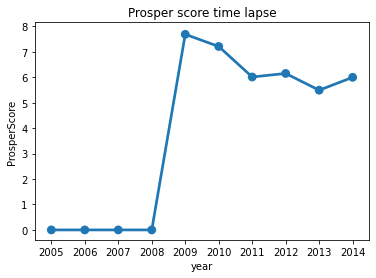

In [32]:
X= clean_df.sort_values('year')
sns.pointplot(data= clean_df, x=X['year'], y='ProsperScore');
plt.title('Prosper score time lapse');

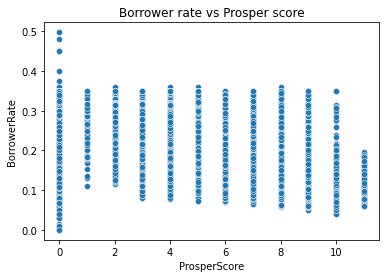

In [48]:
sns.scatterplot(data= clean_df, y='BorrowerRate', x='ProsperScore');
plt.title('Borrower rate vs Prosper score');

> #### This figure shows the general descending trend in the average prosper score over the years since it was first implemented in 2009. However, we can see that there was a minor rise in the years 2012 and 2014.

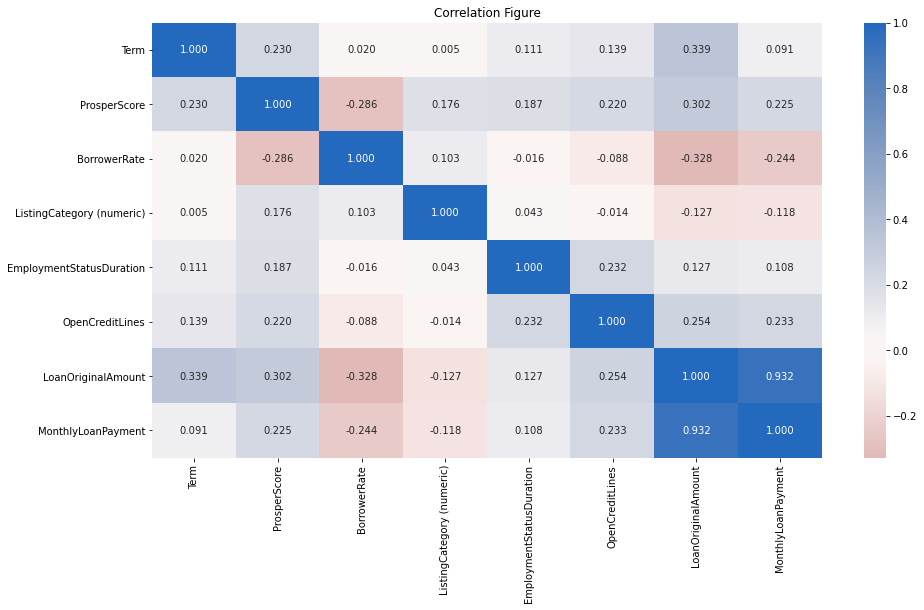

In [46]:
# In this heatmap we're investigating the correlation between various variables 
# to get a deeper look on how each variable affects the others.
variables = ['Term', 'ProsperScore', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 
             'OpenCreditLines', 'LoanOriginalAmount', 'MonthlyLoanPayment']

plt.figure(figsize = [15, 8])
sns.heatmap(clean_df[variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Figure') 
plt.show()

> #### The above figure shows the correlation between the different numeric features. In addition, the relation between the features seems normal - Most features don't correlate highly with each other -, but we can see a strong positive correlation between 'LoanOriginalAmount' and 'MonthlyLoanPayment' and one can drop either one of them to reduce the variables number.

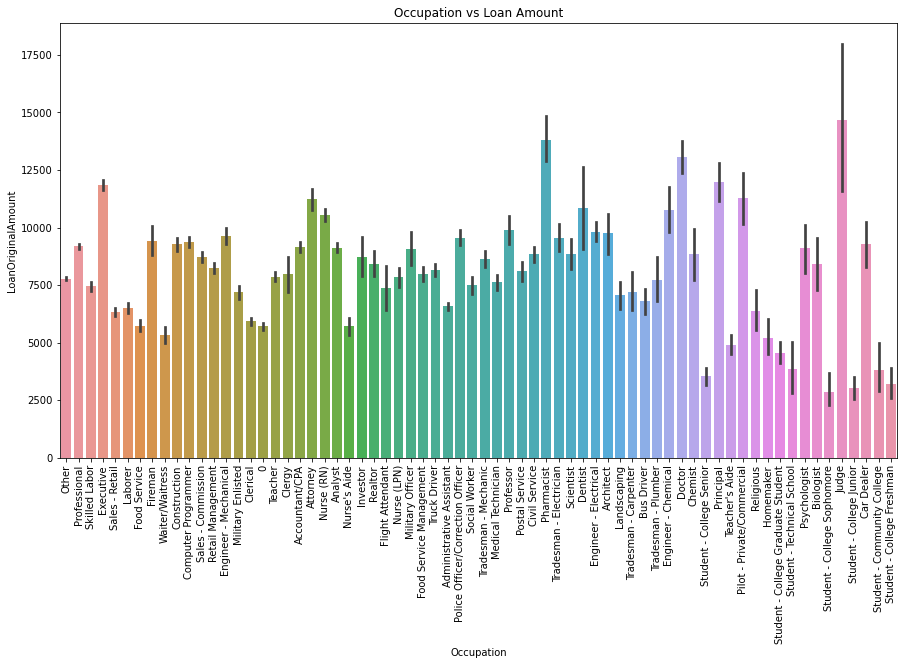

In [35]:
# In the next bar chart we're exploring which occupation is more likely to get higher loans.
plt.figure(figsize = [15, 8])
sns.barplot(data=clean_df,x='Occupation',y='LoanOriginalAmount');
plt.xlabel('Occupation');
plt.ylabel('LoanOriginalAmount');
plt.xticks(rotation=90);
plt.title('Occupation vs Loan Amount');

> #### The above figure shows that judges are highest loan borrowers followed by pharmacists, doctors, then executives. And this is relatable to these professions high income range which enables them to cover the high loans monthly payment corresponding to their loan amount. 

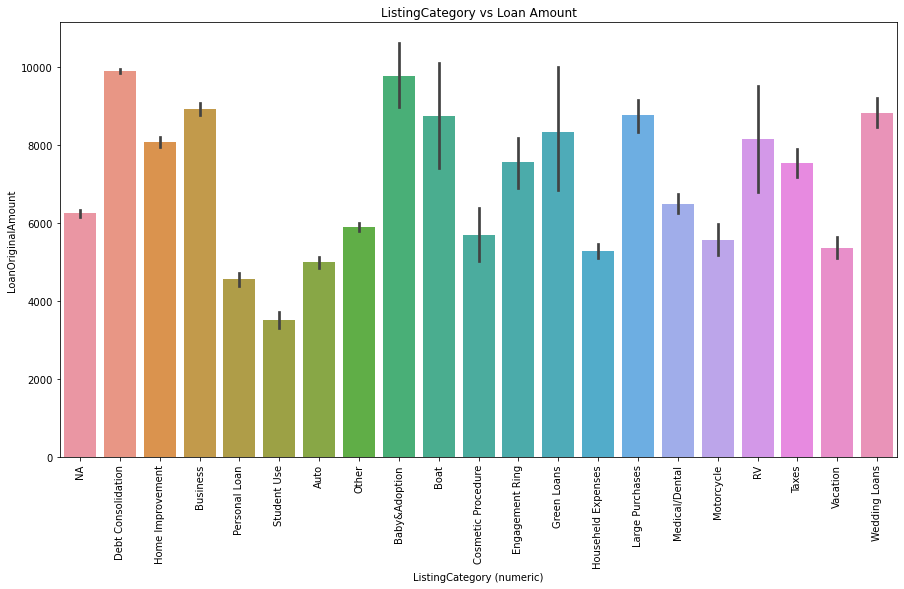

In [36]:
# Here we want to investigate the most common listing categories that people get loans for.
plt.figure(figsize = [15, 8])
ax = plt.gca()
cat_listing=['NA', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto',
             'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
             'Househeld Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation',
            'Wedding Loans']
sns.barplot(data=clean_df,x='ListingCategory (numeric)',y='LoanOriginalAmount');
plt.xlabel('ListingCategory (numeric)');
plt.ylabel('LoanOriginalAmount');
plt.xticks(rotation=90);
ax.set_xticklabels(cat_listing)
plt.title('ListingCategory vs Loan Amount');

> #### Here we can the different loans categories and it shows that "Debt Consolidation" and "Baby&Adoption" are the most common loan reasons, followed by business. However surprisingly, we find that getting a boat shares almost the same importance as large purchases and weeding loans.

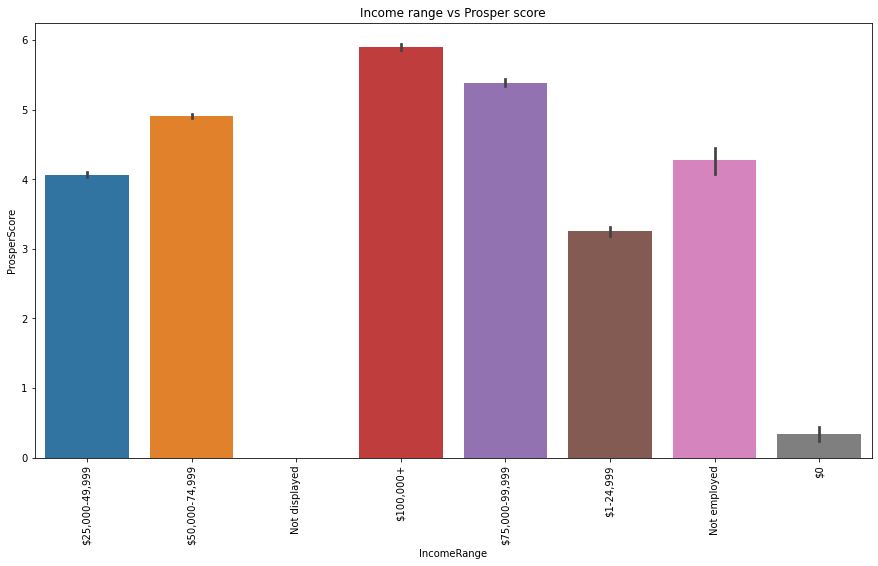

In [37]:
# In this part, we want to identify if there's a relation between the prosper score and income range
plt.figure(figsize = [15, 8])
sns.barplot(data=clean_df,x='IncomeRange',y='ProsperScore');
plt.xlabel('IncomeRange');
plt.ylabel('ProsperScore');
plt.xticks(rotation=90);
plt.title('Income range vs Prosper score');

> #### The above figure shows a logical overall decline in the prosper score  with respect to the decrease in the income range. 
> #### However, I find it very interesting and confusing to see that the average prosper score for the Not Employed category nearly the same as the lower income range "$25,000-49,999" category and requires further analysis to get to the root cause of this phenomena.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> #### One very important graph I have used is the Heatmap which is greatly helpful in identifying the correlated features, giving us the option of neglecting the highly correlated features (Positive or Negative) to reduce the number of variables we're dealing with. And this showed us the great positive correlation between "LoanOriginalAmount" and "MonthlyLoanPayment" - which totally makes sense -. Other than that the other correlations were very weak.
> #### Additionally, in the Occupation vs Loan Amount figure we can see a relation between the occupation and the loan amount, as the income range is relatable to the occupation is most cases that helps in getting bigger loans with little worries on covering the monthly payments.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No. or to be more specific, not within my scope of analysis

## Multivariate Exploration



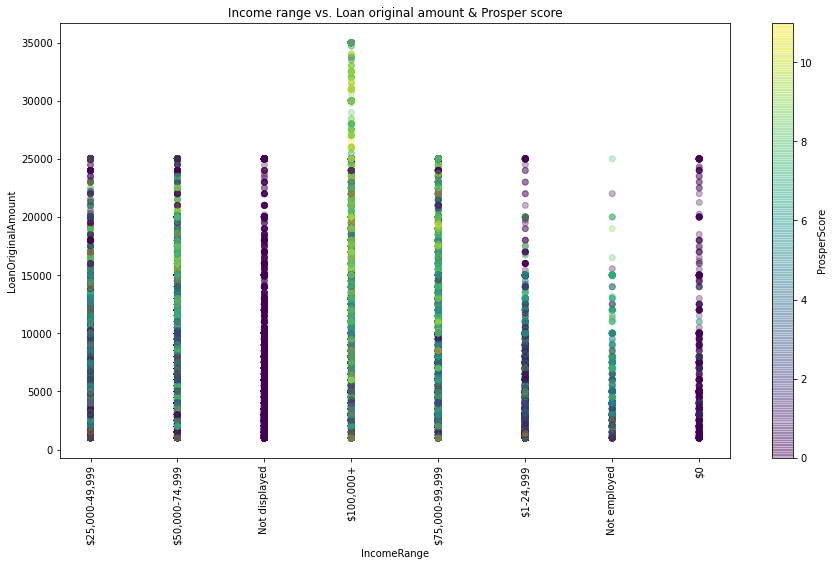

In [38]:
# Here we're going to use a scatter plot to see the relation between Prosper score, Loan amount, and Income range 
plt.figure(figsize = [15, 8])
plt.scatter(data = clean_df, x = 'IncomeRange', y = 'LoanOriginalAmount', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('Income range vs. Loan original amount & Prosper score')
plt.xlabel('IncomeRange')
plt.ylabel('LoanOriginalAmount');
plt.xticks(rotation=90);

> #### In the previous figure we can see the positive correlation between the 3 variables and it validates how the income range affect both the Loan amount and the Prosper score.

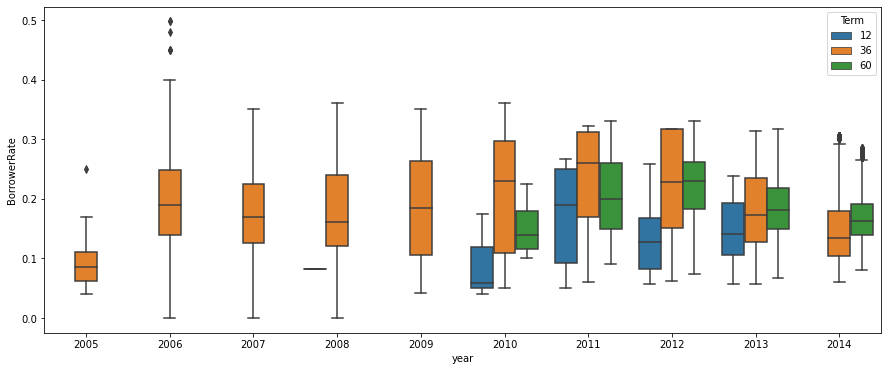

In [39]:
# First we sort the years in an ascending order.
X= clean_df.sort_values('year')
# Then, we create a box plot for the borrower rate vs loan term over the years.
g = sns.boxplot(data=clean_df, x=X['year'], y='BorrowerRate', hue='Term');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)
plt.title('Borrower rate vs. Term & Year')

In [40]:
# To get the loans terms that were present in 2014 
clean_df[clean_df['year']=='2014']['Term'].value_counts()

36    7203
60    3282
Name: Term, dtype: int64

> #### In the above figure, It is clear that till 2009 there was only one loan term. However, after 2009 two other terms were introduced, and we can see that at 2013,2014 the "60 months" term had a higher average borrower rate than the old "36 months" term. Additionally, we can see the absence of the "12 months" term in year 2014.

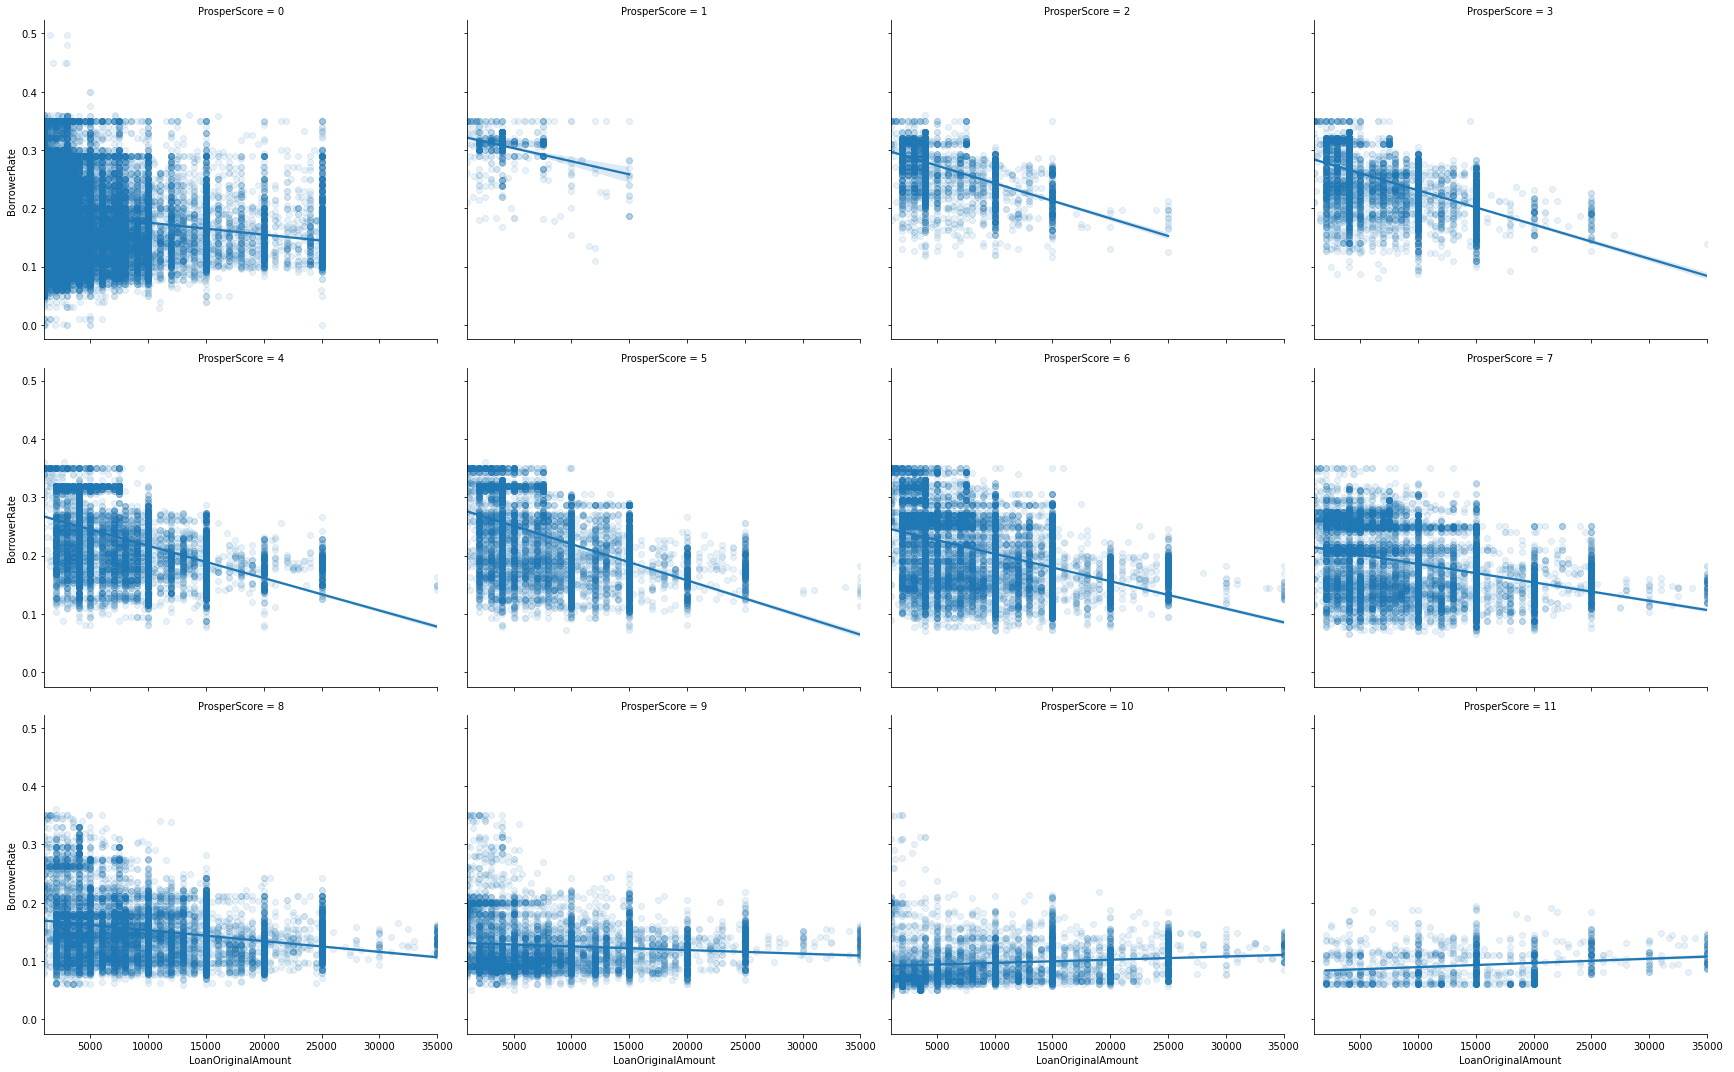

In [44]:
# Prosper rating effect on relationship of borrower rate and loan amount
fig=sns.FacetGrid(data=clean_df, aspect=1.2, height=5, col='ProsperScore', col_wrap=4)
fig.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
fig.add_legend();

> #### In the above figures, we can see that for each prosper score there is an inverse relation between the borrower rate and loan original amount, except for the prosper scores 10,11 the relation became direct.
> ### However, it is worth noting that when the number of loans that have an original amount of 10000 or less decreases and loans with over 10000 increases, we see that trendline increases as the relation between the borrower rate and loan original amount becomes directly proportional.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking back at the Income range vs. Loan original amount & Prosper score figure, it became evident how the 3 features are positively related to each other and they validate the logical sequence of the higher the income range the higher your loan amount can be and how much better your prosper score can get.
> Moreover, I found it interesting that the medium ranged loan term was the most common chosen term, although the 
"60 months" have had a higher average borrower rate since 2012.

### Were there any interesting or surprising interactions between features?

> One thing I have noticed from the Correlation Figure is that although "MonthlyLoanPayment" and "LoanOriginalAmount" had a very strong positive correlation "=0.932", we find a huge correlation difference between these two features and the "Term" feature, which will need further analysis to see wether we'll be able to remove one of the highly correlated features in order to decrease our variables number or not.
